Import libraries 

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib import pyplot 
%matplotlib inline

# ML Libraries
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, f1_score, accuracy_score, recall_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_curve

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier



# Tree Visualization
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot 


#Data exploration

In [ ]:
#import dataset

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#Let's see the variables with higher standard deviation

df.std()

Time      47488.145955
V1            1.958696
V2            1.651309
V3            1.516255
V4            1.415869
V5            1.380247
V6            1.332271
V7            1.237094
V8            1.194353
V9            1.098632
V10           1.088850
V11           1.020713
V12           0.999201
V13           0.995274
V14           0.958596
V15           0.915316
V16           0.876253
V17           0.849337
V18           0.838176
V19           0.814041
V20           0.770925
V21           0.734524
V22           0.725702
V23           0.624460
V24           0.605647
V25           0.521278
V26           0.482227
V27           0.403632
V28           0.330083
Amount      250.120109
Class         0.041527
dtype: float64

In [ ]:
#checking for NaN values
df.isnull().values.any()

False

In [ ]:
#proportions of the the class variable, calculating the percentage
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (No Fraud: 0   Fraud: 1)')

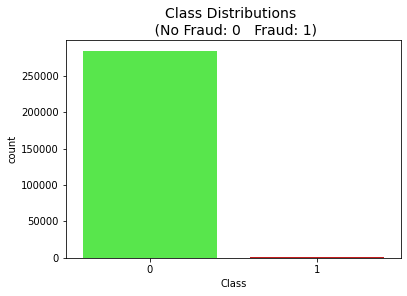

In [ ]:
#plotting how imbalanced is the target variable 'Class'
colors = ["#42FF33", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (No Fraud: 0   Fraud: 1)', fontsize=14)

In [ ]:
max(df.Amount), min(df.Amount)

(25691.16, 0.0)

In [ ]:
max(df.Time), min(df.Time)

(172792.0, 0.0)

(0.0, 172792.0)

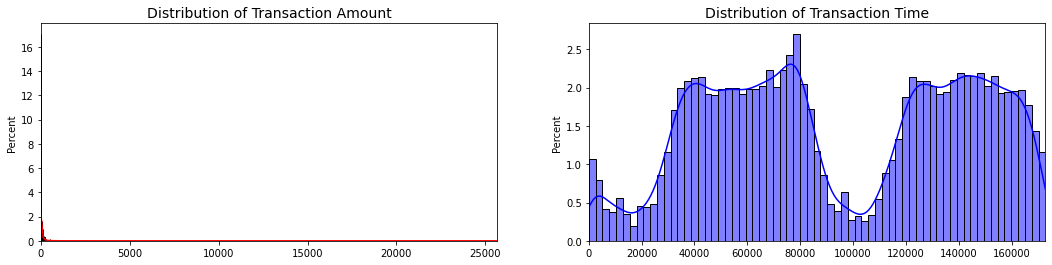

In [ ]:
#checking distribution of variables 'Time' and 'Amount' we observe that these variables are very biased
#we'll be using percent stat: normalize such that bar heights sum to 100

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', label="100% Equities", kde=True, stat="percent", linewidth=1 )
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.histplot(time_val, ax=ax[1], color='b', label="100% Equities", kde=True, stat="percent", linewidth=1)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])




In [ ]:
df_ml= df.drop(['Time'], axis= 1)

In [ ]:
df_ml.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

In [ ]:
#We've grouped the variables in three groups by the standard deviation. Firstly, we're doing this in order to create a pairplot faster. 
#Secondly, we can use this split to train the same ml algorithms but with three different sets of variables
#However it doesn't make a lot of sense creating pairplots while the dataset is imbalanced
param1 = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'Class']

param2 = ['V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21','V22', 'Class']

param3 = ['V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class']

In [ ]:
#sns.pairplot(df_ml[param1], hue = 'Class') 

#Classification Neural Network

In [ ]:
COLAB = True

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

def display_model(model):
    if COLAB:
        display(SVG(model_to_dot(model, show_shapes=True,dpi=72).create(prog='dot', format='svg')))
    else:
        display(SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg')))

In [ ]:
#######################GRAFICA AUC###############################
from matplotlib.ticker import MaxNLocator

def grafica_entrenamiento(tr_auc, val_auc, tr_loss, val_loss, best_i,
                          figsize=(10,4)):
    plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    plt.plot(1+np.arange(len(tr_auc)),  100*np.array(tr_auc))
    plt.plot(1+np.arange(len(val_auc)), 100*np.array(val_auc))
    plt.plot(best_i, 100*val_auc[best_i], 'or')
    plt.title('AUC del modelo (%)', fontsize=18)
    plt.ylabel('AUC (%)', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.subplot(1,2,2)
    plt.plot(1+np.arange(len(tr_auc)), np.array(tr_loss))
    plt.plot(1+np.arange(len(val_auc)), np.array(val_loss))
    plt.plot(best_i, val_loss[best_i], 'or')
    plt.title('loss del modelo', fontsize=18)
    plt.ylabel('loss', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

In [ ]:
def analisis_roc(y_true, y_probas_predicted, POSITIVE_CLASS=1):
    s = y_probas_predicted.shape
    if len(s) == 1:
        positive_class_scores = y_probas_predicted
    elif len(s) == 2 and s[1] == 1:
        positive_class_scores = y_probas_predicted[:,0]
    else:
        positive_class_scores  = y_probas_predicted[:,POSITIVE_CLASS]

    fpr, tpr, thresholds = roc_curve(y_true,
                                     positive_class_scores,
                                     pos_label=POSITIVE_CLASS)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC. Positive class: '+str(POSITIVE_CLASS))
    plt.legend(loc="lower right");

In [ ]:
def precision_recall(y, y_probas_predicted, POSITIVE_CLASS=1):
  s = y_probas_predicted.shape
  if len(s) == 1:
    positive_class_scores = y_probas_predicted
  elif len(s) == 2 and s[1] == 1:
    positive_class_scores = y_probas_predicted[:,0]
  else:
    positive_class_scores  = y_probas_predicted[:,POSITIVE_CLASS]
  # predict class values
  yhat = (model.predict(X_test) > 0.5).astype("int32")#model.predict_classes(X_test)
  # calculate precision and recall for each threshold
  metric_precision, metric_recall, th = precision_recall_curve(y, positive_class_scores)

  # calculate scores
  metric_f1, metric_auc = f1_score(y, yhat), auc(metric_recall, metric_precision)
  # summarize scores
  print(model.__class__.__name__+ ': f1=%.3f auc=%.3f' % (metric_f1, metric_auc))
  # plot the precision-recall curves
  no_skill = len(y[y==1]) / len(y)
  plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
  plt.plot(metric_recall, metric_precision, marker='.', label='precision recall curve')
  plt.plot(metric_recall[1:], th, marker='.', label='Threshold')
  # axis labels
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  
  # show the legend
  plt.legend()

   



In [ ]:
def compute_metrics(y_true, y_probas_predicted, POSITIVE_CLASS=1):
    s = y_probas_predicted.shape
    if len(s) == 1:
        positive_class_scores = y_probas_predicted
    elif len(s) == 2 and s[1] == 1:
        positive_class_scores = y_probas_predicted[:,0]
    else:
        positive_class_scores  = y_probas_predicted[:,POSITIVE_CLASS]

    fpr, tpr, thresholds = roc_curve(y_true,
                                     positive_class_scores,
                                     pos_label=POSITIVE_CLASS)
    mcm = confusion_matrix(y_true, positive_class_scores)
    tn = mcm[0, 0]
    tp = mcm[1, 1]
    fn = mcm[1, 0]
    fp = mcm[0, 1]

    Accuracy = accuracy_score(y_true, positive_class_scores)
    Recall = recall_score(y_true, positive_class_scores)
    Specificity = tn / (tn + fp)
    Precision = tp/(tp+fp)
    f1_score = 2*((Precision*Recall)/(Precision+Recall))
    AUC= metrics.auc(fpr, tpr)

    print(" Accuracy is %2.3f" % Accuracy)
    print(" AUC is %2.3f" % AUC)
    print(" Sensitivity-Recall is %2.3f" % Recall)
    print(" Specificity is %2.3f" % Specificity) 
    print(" f1_score is %2.3f" % f1_score)
    # print classification report
    print(classification_report(y_true, positive_class_scores))

In [ ]:
def plot_confusion_matrix(y_true, y_predicted,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    cm = confusion_matrix(y_true, y_predicted)
    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    classes = np.unique(y_test)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout();

##Test and train split

In [ ]:
##----------------------------
# Train & Test split with no normalization

X = df_ml.drop('Class',axis=1)
y = df_ml['Class']

seed = 123
test_size = 0.30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                    random_state=seed)


In [ ]:
#normalise the amount column
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scale.fit(X_train[['Amount']])
X_train['Amount'] = scale.transform(X_train[['Amount']])
X_test['Amount'] = scale.transform(X_test[['Amount']])


In [ ]:
X.min(), X.max()

(V1        -56.407510
 V2        -72.715728
 V3        -48.325589
 V4         -5.683171
 V5       -113.743307
 V6        -26.160506
 V7        -43.557242
 V8        -73.216718
 V9        -13.434066
 V10       -24.588262
 V11        -4.797473
 V12       -18.683715
 V13        -5.791881
 V14       -19.214325
 V15        -4.498945
 V16       -14.129855
 V17       -25.162799
 V18        -9.498746
 V19        -7.213527
 V20       -54.497720
 V21       -34.830382
 V22       -10.933144
 V23       -44.807735
 V24        -2.836627
 V25       -10.295397
 V26        -2.604551
 V27       -22.565679
 V28       -15.430084
 Amount      0.000000
 dtype: float64, V1            2.454930
 V2           22.057729
 V3            9.382558
 V4           16.875344
 V5           34.801666
 V6           73.301626
 V7          120.589494
 V8           20.007208
 V9           15.594995
 V10          23.745136
 V11          12.018913
 V12           7.848392
 V13           7.126883
 V14          10.526766
 V15      

In [ ]:
X.shape

(284807, 29)

Parto el conjunto de training en tr (training final) y validación:

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                            test_size=test_size,
                                            random_state=seed,
                                            stratify=y_train)

###Oversampling using SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_bal, y_train_bal = sm.fit_resample(X_tr, y_tr) #.ravel()

In [ ]:
print('After OverSampling, the shape of X_train: {}'.format(X_train_bal.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_bal.shape))

After OverSampling, the shape of X_train: (278644, 29)
After OverSampling, the shape of y_train: (278644,) 



In [ ]:
X_train_bal.shape, y_train_bal.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((278644, 29), (278644,), (59810, 29), (59810,), (85443, 29), (85443,))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2, L1
from keras.optimizer_v2.adam import Adam
from keras.optimizer_v2.rmsprop import RMSprop
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras.metrics import AUC 

In [ ]:
#red neuronal de clasificación

n_inputs = X.shape[1] # número de variables que entrenamos, 12 en este caso

model = Sequential()

model.add(Dense(50, input_shape=(n_inputs,), activation='relu', kernel_regularizer=l2(0.05)))  #kernel_regularizer=L1(0.05) capa oculta #))
model.add(Dense(1, activation='sigmoid')) # problema de clasificación en 2 clases: 0 no fraude, 1 fraude
model.compile(loss='binary_crossentropy',
              optimizer=Adam(0.0001),    # Adam y RMSprop son dos algoritmos muy típicos para entrenar redes
              metrics=[tf.keras.metrics.AUC()])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1500      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,551
Trainable params: 1,551
Non-trainable params: 0
_________________________________________________________________


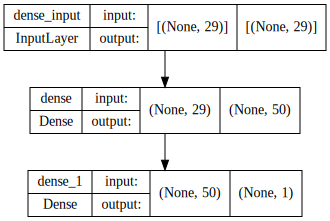

In [ ]:
display_model(model)

## **Entrenamiento del modelo**

In [ ]:
from keras.callbacks import ModelCheckpoint

acum_tr_auc = []
acum_val_auc = []
best_val_auc = -1000
acum_tr_loss  = []
acum_val_loss = []

epochs = 100

modelpath="best_model.h5"

checkpoint = ModelCheckpoint(modelpath, monitor=metrics.AUC, verbose=1,
                             save_best_only=True,
                             mode='max') # graba sólo los que mejoran en validación
callbacks_list = [checkpoint]

In [ ]:
from IPython.display import clear_output

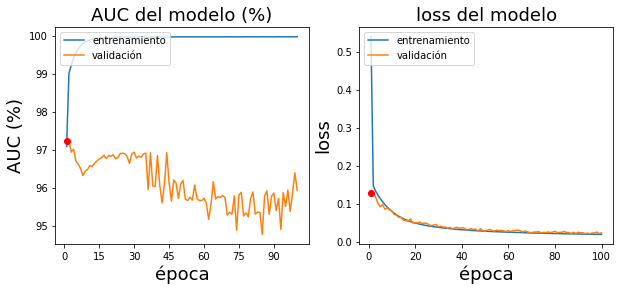

In [ ]:
for e in range(epochs):
    history = model.fit(X_train_bal, y_train_bal, epochs=1, batch_size=30, callbacks=callbacks_list,
                        verbose=10, validation_data=(X_val,y_val))
    
    if history.history['val_auc'][-1] > best_val_auc:
        print("Validation auc improved from",
            best_val_auc, 'to', history.history['val_auc'])
        print("saving weights")
        best_val_auc = history.history['val_auc'][-1]
    
    acum_tr_auc.append(history.history['auc'][0])
    acum_val_auc.append(history.history['val_auc'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])
    
    if len(acum_tr_auc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_auc) + 1
        grafica_entrenamiento(acum_tr_auc, acum_val_auc, acum_tr_loss, acum_val_loss, best_i)

In [ ]:
#el loss tiene esa gráfica porque training está balanceado pero validation no

In [ ]:
modelpath

'best_model.h5'

In [ ]:
from keras.models import load_model

model = load_model('best_model.h5')

OSError: ignored

## **Análisis de los resultados del modelo**

In [ ]:
probs_predicciones_test = model.predict(X_test).flatten()
len(probs_predicciones_test)

85443

**Score ("acc") en test:**

In [ ]:
predicciones_test = np.round(probs_predicciones_test) #round da score muy alto

np.mean(y_test == predicciones_test)

0.9957632573762626

Score en training:

In [ ]:
np.mean(y_train_bal == np.round(model.predict(X_train_bal).flatten()))

0.9982917270782791

Score en validación:

In [ ]:
np.mean(y_val == np.round(model.predict(X_val).flatten()))

0.9958535361979602

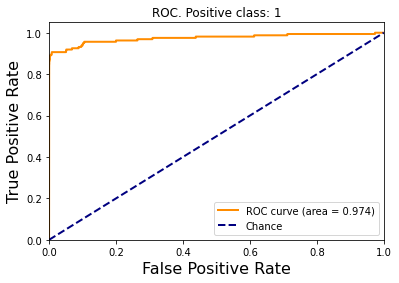

In [ ]:
analisis_roc(y_test, probs_predicciones_test, POSITIVE_CLASS=1)

[[84938   345]
 [   17   143]]


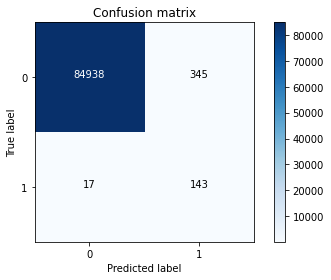

In [ ]:

plot_confusion_matrix(y_test, predicciones_test)

Sequential: f1=0.441 auc=0.819


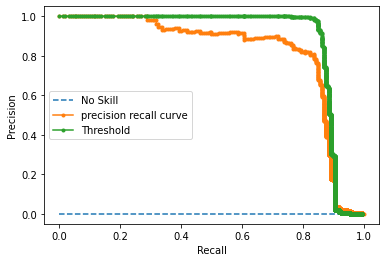

In [ ]:
precision_recall(y_test, probs_predicciones_test, POSITIVE_CLASS=1)

In [ ]:
compute_metrics(y_test, predicciones_test, POSITIVE_CLASS=1)

 Accuracy is 0.996
 AUC is 0.945
 Sensitivity-Recall is 0.894
 Specificity is 0.996
 f1_score is 0.441
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85283
           1       0.29      0.89      0.44       160

    accuracy                           1.00     85443
   macro avg       0.65      0.94      0.72     85443
weighted avg       1.00      1.00      1.00     85443

